# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#importeren van de data via pandas
t, T = pd.read_csv('tempmetingen.csv', sep=';').to_numpy()[:,0], pd.read_csv('tempmetingen.csv', sep=';').to_numpy()[:,1]

m_m, m_mwb, m_mwe = 0.8208, 1.2929, 1.2749 #massa maatbeker, massa maatbeker+water:begin, massa maatbeker+water:eind
m_wb, m_we = m_mwb - m_m, m_mwe - m_m      #massa water:begin, massa water:eind

#het maken van de trendlijn mbv curve_fit
t_fit, T_fit = t[t <= 10], T[t <= 10] #punten die gebruikt woorden voor de fit 
def trendlijn(t, a, b):               #model voor de fit
    return a * t + b

popt, pcov = curve_fit(trendlijn, t_fit, T_fit)
a, b = popt

x_trendlijn = np.arange(0, len(t), 1)
y_trendlijn = trendlijn(x_trendlijn, a, b)

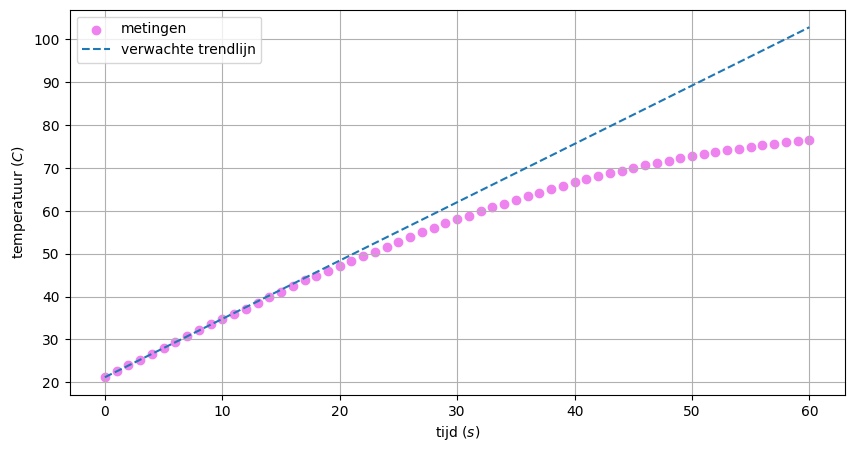

In [86]:
plt.figure(figsize=(10,5))
plt.scatter(t, T, color='violet', label='metingen')
plt.plot(x_trendlijn, y_trendlijn, '--', label='verwachte trendlijn')
plt.xlabel('tijd ($s$)')
plt.ylabel('temperatuur ($C$)')
plt.legend()
plt.grid()
plt.show()

# Aannames
* Homogene temperatuur: het water in de maatbeker heeft op elk tijdstip één uniforme temperatuur. Convectie door het verwarmingselement zorgt voor voldoende menging.
* Constante warmtecapaciteit van water: de soortelijke warmte van water wordt constant genomen als $c_w = 4180 ,\mathrm{J,kg^{-1},K^{-1}}$. Temperatuursafhankelijkheid wordt verwaarloosd.
* Verdamping bij de gemeten watertemperatuur: het verdwenen water is volledig verdampt tijdens het experiment. We nemen aan dat dit gebeurt bij (ongeveer) de gemiddelde watertemperatuur, maar gebruiken de standaard verdampingswarmte bij $100^\circ\mathrm{C}$: $L_v = 2.26 \times 10^6 ,\mathrm{J,kg^{-1}}$. Dit is een benadering; in werkelijkheid is $L_v$ iets groter bij lagere temperaturen.
* Geen warmteopslag in de maatbeker: de warmte die nodig is om de maatbeker zelf op te warmen wordt verwaarloosd. Dit is een bewuste onderschatting van de benodigde energie.
* Toegevoerde energie: alle elektrisch toegevoerde energie gaat óf in opwarming van het water, óf in verdamping van water. Warmteverlies aan de omgeving wordt niet apart gemodelleerd maar volgt impliciet uit het energietekort.
* Lineaire temperatuurstijging in de beginfase: de fit over de eerste $10,\mathrm{min}$ representeert het ideale geval waarin alle toegevoerde warmte in het water gaat (geen verdamping, geen warmteverliezen).


In [4]:
# natuurkundige constanten
c_w = 4180             # J/(kg K)
L_v = 2.26e6           # J/kg

# verdampte massa
dm_evap = m_wb - m_we  

# temperatuurverandering
T_begin = T[0]
T_eind = T[-1]
dT = T_eind - T_begin

# energie voor opwarming water
Q_opwarming = m_wb * c_w * dT

# energie voor verdamping
Q_verdamping = dm_evap * L_v

# totale benodigde energie
Q_totaal = Q_opwarming + Q_verdamping

# resultaten
print(f"Beginmassa water: {m_wb:.4f} kg")
print(f"Eindmassa water: {m_we:.4f} kg")
print(f"Verdampte massa: {dm_evap:.4f} kg\n")

print(f"Temperatuurstijging: {dT:.2f} K")

print(f"Energie opwarming water: {Q_opwarming:.2e} J")
print(f"Energie verdamping: {Q_verdamping:.2e} J")
print(f"Totaal benodigde energie: {Q_totaal:.2e} J")

Beginmassa water: 0.4721 kg
Eindmassa water: 0.4541 kg
Verdampte massa: 0.0180 kg

Temperatuurstijging: 55.40 K
Energie opwarming water: 1.09e+05 J
Energie verdamping: 4.07e+04 J
Totaal benodigde energie: 1.50e+05 J


### 3. Aanbevelingen

Het elektrisch vermogen van het verwarmingselement is in dit experiment niet direct gemeten. Door spanning en stroom tijdens het verwarmen te meten kan de toegevoerde energie rechtstreeks worden bepaald in plaats van indirect via de temperatuurstijging. Dit maakt de energiebalans betrouwbaarder.

Daarnaast is de massa van het water alleen aan het begin en aan het einde gemeten. Door tussentijds te wegen kan beter worden vastgesteld op welk moment verdamping optreedt en hoe groot de bijdrage van verdamping is tijdens het proces.

Verder gaat een deel van de toegevoerde energie verloren aan de omgeving. Door de maatbeker beter te isoleren wordt dit warmteverlies kleiner, waardoor de gemeten temperatuurontwikkeling beter overeenkomt met het theoretische model.

De temperatuur van het water is gemeten met één sensor. Door het water tijdens het verwarmen te roeren of de temperatuur op meerdere plaatsen te meten, kan worden gecontroleerd of het water daadwerkelijk overal dezelfde temperatuur heeft. Dit voorkomt meetfouten door temperatuurgradiënten in het water.